In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### All csv files and python code file are in the same directory. so by default csv file load possible with out any chaging in path. 
#### If incase, any manipulation done with csv files location after un-zip, please update path accordingly. thank you. 

# Part 1-A

In [2]:
# read "Data I-A" dataset

df_data = pd.read_csv('Data_I_A.csv')
df_data.head()


,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [3]:
# Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17 & 2012-13.

df_data = df_data.loc[(~((df_data['Duration']=='2016-17') | (df_data['Duration']=='2012-13')))]

df_data

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [4]:
# checking for shape of the dataframe

df_data.shape

(7, 36)

In [5]:
# checking for missing values from the each column in the dataset. 

(df_data.isnull().sum())

# "West Bengal1" state is not having any value. 
# so we can delete that state from dataframe, since there is no data source to collect additional details.

Items  Description           0
Duration                     0
Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             2
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  2
Manipur                      2
Meghalaya                    0
Mizoram                      2
Nagaland                     2
Odisha                       0
Punjab                       2
Rajasthan                    2
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      2
Uttar Pradesh                0
Uttarakhand                  0
West Bengal1                 7
Andaman & Nicobar Islands    2
Chandiga

In [6]:
# all the leading and trailing spaces are removed in the resultant dataframe

df_data.columns = df_data.columns.str.strip()

In [7]:
# delete 'West Bengal1' state

df_data.drop(columns = 'West Bengal1', inplace = True)

In [8]:
# Create new dataframe with deleting 'Duration' column, which is not required to analysis

df_GSDP = df_data.drop(columns = 'Duration')

In [9]:
# apply group by function on "Item Description" to make mean() 

df_GSDP_mean = df_GSDP.groupby('Items  Description').mean().round(2)
df_GSDP_mean = df_GSDP_mean.iloc[:1]
df_GSDP_mean.head()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
Items Description,,,,,,,,,,,,,,,,,,,,,
(% Growth over previous year),14.03,14.41,12.65,13.6,13.7,6.03,11.13,11.85,12.28,10.9,...,12.34,12.76,17.03,11.94,11.8,13.78,11.96,12.16,12.05,11.2


In [10]:
# make transpose the dataframe
df_GSDP_mean_t = df_GSDP_mean.transpose()

# sort the values of dataframe w..r.t "(% Growth over previous year)" column 
df_GSDP_mean_t.sort_values(by = '(% Growth over previous year)', ascending = False, inplace= True)

# determine the all india avg gdp growth rate

India_Avg_GDP_Growth_rate = df_GSDP_mean_t.loc['All_India GDP', '(% Growth over previous year)'].round(2)
print('All India Average GDP Growth rate : {} %'.format(India_Avg_GDP_Growth_rate))

# drop the 'All_India GDP' row , which is not requred for our ploting

df_GSDP_mean_t.drop('All_India GDP', inplace = True)

All India Average GDP Growth rate : 11.2 %


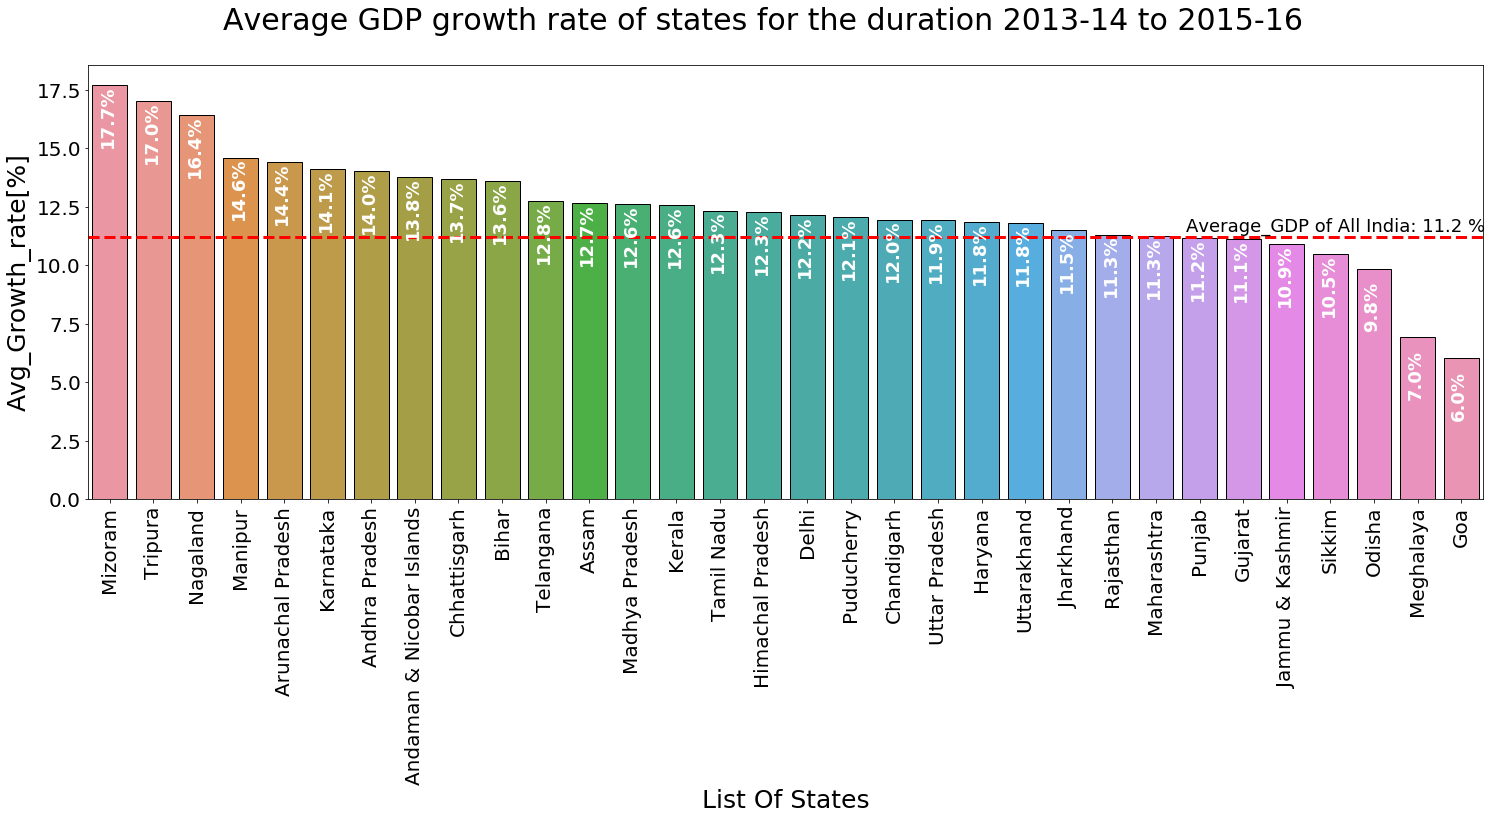

In [11]:
# plot for average GDP growth rate of states for the duration 2013-14 to 2015-16

plt.figure(figsize = (25,8))   # Fingure size 

# create bar plot using seaborn library
fig = sns.barplot(x = df_GSDP_mean_t.index ,y = '(% Growth over previous year)', 
                   data =df_GSDP_mean_t, edgecolor = 'k')

plt.xticks(rotation=90)   # rorate the x axis ticks to 90 degrees angle

# horizontal on the bar plot showing average all india GDP 
plt.axhline(y=India_Avg_GDP_Growth_rate, color='r', linestyle='--',linewidth= 3) 
plt.figtext(.735, .59, "Average_GDP of All India: 11.2 %", fontsize=18) # lable for the horizontal line

# Title for the plot
plt.suptitle('Average GDP growth rate of states for the duration 2013-14 to 2015-16', fontsize=30)

# labels for the axiss
plt.xlabel('List Of States',fontsize=25)
plt.ylabel('Avg_Growth_rate[%]',fontsize=25)

# updating font size for the axis ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


# to show the percentage values on each bar in the bat plot
for p in fig.patches:
    
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    fig.annotate('{:.1f}%'.format(height), (x+0.15, y + height-2.5),
                 fontsize=18, rotation=90, color = 'white',weight='bold')

plt.show()

### From the Bar plot, we can notice that   
**Top 5 fast growing states :**  Mizoram, Tripura, Manipur, Arunachal Pradesh, Karnataka  
**Top 5 struggling states :** Goa, Meghalaya, Odisha, Sikkim, Jammu & Kashmir

In [12]:
#Curiosity exercise:
# create new dataframe for the state of Andhara Pradesh to compare the growth rate of A.P with all india growth rate

df_GSDP_AP = df_GSDP_mean.transpose().loc[['All_India GDP','Andhra Pradesh'],:]

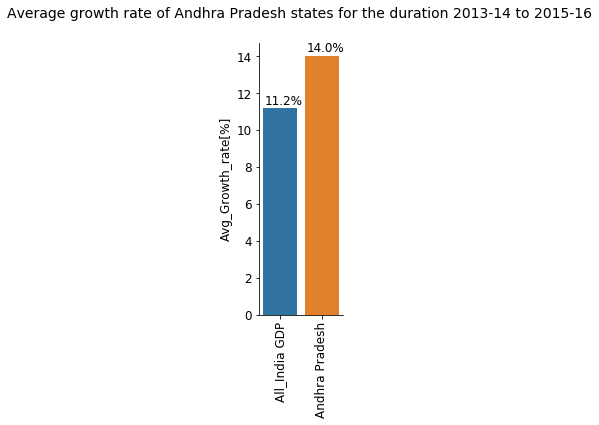

In [13]:
plt.figure(figsize = (1.5,5))
fig = sns.barplot(x = df_GSDP_AP.index ,y = '(% Growth over previous year)', data =df_GSDP_AP)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=90)

plt.suptitle('Average growth rate of Andhra Pradesh states for the duration 2013-14 to 2015-16', fontsize=14)

plt.xlabel('')
plt.ylabel('Avg_Growth_rate[%]',fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for p in fig.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    fig.annotate('{:.1f}%'.format(height), (x+0.03, y + height + .2),fontsize=12)

plt.show()

In [14]:
print('Average Growth rate of All India is: {}'.format(df_GSDP_AP['(% Growth over previous year)'][0].round(2)))
print('Average Growth rate of Andhra Pradesh is: {}'.format(df_GSDP_AP['(% Growth over previous year)'][1].round(2)))

Average Growth rate of All India is: 11.2
Average Growth rate of Andhra Pradesh is: 14.03


In [15]:
df_GSDP_2015_16 = df_data.loc[df_data['Duration']=='2015-16']    # extract the data for the duation of 2015-16 from the df_data
df_GSDP_2015_16 = df_GSDP_2015_16.drop(columns = ['Duration','All_India GDP'])   # drop the columns which are not required
df_GSDP_2015_16.set_index('Items  Description', inplace = True)  # set index for the data frame
df_GSDP_2015_16_t = df_GSDP_2015_16.transpose() # transpose the data frame on requirement

# sort the values of dataframe w..r.t "GSDP - CURRENT PRICES (` in Crore)" column 
df_GSDP_2015_16_t.sort_values(by = 'GSDP - CURRENT PRICES (` in Crore)', ascending = False, inplace= True)

In [16]:
df_GSDP_2015_16_t.isnull().sum() # checking for missing values of column wise

Items  Description
GSDP - CURRENT PRICES (` in Crore)    9
(% Growth over previous year)         9
dtype: int64

In [17]:
df_GSDP_2015_16_t.isnull().sum(axis=1) # checking for missing values of row wise

Tamil Nadu                   0
Uttar Pradesh                0
Karnataka                    0
Gujarat                      0
Andhra Pradesh               0
Kerala                       0
Telangana                    0
Delhi                        0
Madhya Pradesh               0
Haryana                      0
Bihar                        0
Odisha                       0
Chhattisgarh                 0
Jharkhand                    0
Assam                        0
Uttarakhand                  0
Jammu & Kashmir              0
Goa                          0
Chandigarh                   0
Meghalaya                    0
Puducherry                   0
Arunachal Pradesh            0
Sikkim                       0
Himachal Pradesh             2
Maharashtra                  2
Manipur                      2
Mizoram                      2
Nagaland                     2
Punjab                       2
Rajasthan                    2
Tripura                      2
Andaman & Nicobar Islands    2
dtype: i

In [18]:
df_GSDP_2015_16_t.dropna(how = 'any', axis = 0, inplace = True) # remove all missing values 
df_GSDP_2015_16_t.head()

Items Description,GSDP - CURRENT PRICES (` in Crore),(% Growth over previous year)
Tamil Nadu,1212668.0,10.99
Uttar Pradesh,1153795.0,10.58
Karnataka,1027068.0,11.42
Gujarat,994316.0,11.09
Andhra Pradesh,609934.0,15.85


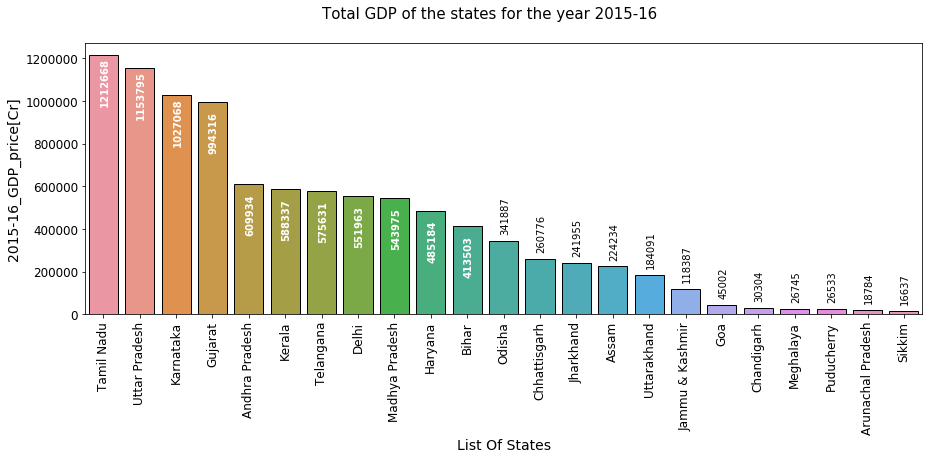

In [19]:
 # Plot the total GDP of the states for the year 2015-16

plt.figure(figsize = (15,5))
#plt.grid()
fig = sns.barplot(x = df_GSDP_2015_16_t.index ,y = 'GSDP - CURRENT PRICES (` in Crore)', 
            data =df_GSDP_2015_16_t, edgecolor = 'k')
plt.xticks(rotation=90)

plt.suptitle('Total GDP of the states for the year 2015-16', fontsize=15)

plt.xlabel('List Of States',fontsize=14)
plt.ylabel('2015-16_GDP_price[Cr]',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# for annotation , need different Y offset to make good representation. so for this i used if-else to adjust Y offset. 
count = 0
for p in fig.patches:
    count+=1
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if(count < len(df_GSDP_2015_16_t)*0.5):
        fig.annotate('{:.0f}'.format(height), (x+0.3, y + height-230000), 
                     fontsize=10, rotation=90, color = 'white',weight='bold')
    elif(count < len(df_GSDP_2015_16_t)*0.75):
        fig.annotate('{:.0f}'.format(height), (x+0.3, y + height+40000), 
                     fontsize=10, rotation=90, color = 'black')
    else:
        fig.annotate('{:.0f}'.format(height), (x+0.3, y + height+40000), 
                     fontsize=10, rotation=90, color = 'black')

plt.show()

## From the above bar plot, we can notice that   
**Top 5 _ high GDP states :**  Tamil Nadu, Uttar Pradesh, Karnataka, Gujarat, Andhra Pradesh  
**Bottom 5 _ low GDP states :** Sikkim, Arunachal Pradesh, Puducherry, Meghalaya, Chandigarh  

**Data for following states not available, hence removed the data for the same:**
* Himachal Pradesh
* Maharashtra
* Manipur
* Mizoram
* Nagaland
* Punjab
* Rajasthan
* Tripura
* Andaman & Nocibar Islands

# Part 1-B

In [20]:
import os
import glob

# store the list of CSV files avalible starting with "NAD" 
files = glob.glob('NAD*.csv')
print(files)

['NAD-Andaman_Nicobar_Islands-NSVA_cur_2014-15.csv', 'NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv', 'NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv', 'NAD-Assam-GSVA_cur_2015-16.csv', 'NAD-Bihar-GSVA_cur_2015-16.csv', 'NAD-Chandigarh-NSVA_cur_2015-16.csv', 'NAD-Chhattisgarh-GSVA_cur_2016-17.csv', 'NAD-Delhi-NSVA_cur_2016-17.csv', 'NAD-Goa-GSVA_cur_2015-16.csv', 'NAD-Gujarat-GSVA_cur_2015-16.csv', 'NAD-Haryana-GSVA_cur_2016-17.csv', 'NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv', 'NAD-Jammu_Kashmir-GSVA_cur_2015-16.csv', 'NAD-Jharkhand-GSVA_cur_2015-16.csv', 'NAD-Karnataka-GSVA_cur_2015-16.csv', 'NAD-Kerala-GSVA_cur_2015-16.csv', 'NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv', 'NAD-Maharashtra-GSVA_cur_2014-15.csv', 'NAD-Manipur-GSVA_cur_2014-15.csv', 'NAD-Meghalaya-GSVA_cur_2016-17.csv', 'NAD-Mizoram-GSVA_cur_2014-15.csv', 'NAD-Nagaland-GSVA_cur_2014-15.csv', 'NAD-Odisha-GSVA_cur_2016-17.csv', 'NAD-Puducherry-NSVA_cur_2016-17.csv', 'NAD-Punjab-GSVA_cur_2014-15.csv', 'NAD-Rajasthan-GSVA_cur_2014-15.csv

**Created def-function to load csv and perform data cleaning which needed for our analysis.**  
**Reason for creating separate function:**  
* **This function will be called twice while creating combine dataframe. so decided to keep this piece code seperately.**





In [21]:
def read_csv_and_pre_process_df(csv_file_name):
    
    df = pd.read_csv(csv_file_name, encoding = "ISO-8859-1")   # read csv to data frame
    df['S.No.'] = df['S.No.'].str.strip()   # all the leading and trailing ' ' (Spaces) are removed in the resultant dataframe
    df['S.No.'] = df['S.No.'].str.strip('.')   # all the leading and trailing '.' are removed in the resultant dataframe
    df['Item'] = df['Item'].str.strip('*')     # all the leading and trailing '*' are removed in the resultant dataframe 
    
    # extract only sectors and sub-sectors, but not further down to sub sectors details 
    df['S.No.'] = df['S.No.'].apply(lambda row:'True' if ((row.isdigit()) or (row=='Total')) else 'False') 
    df = df.loc[df['S.No.']=='True']
    df = df[['Item', '2014-15']]   # keep only 'Item' & '2014-15' which are need for our analysis
    return(df)

**I used glod library for combining multiple csv files using for-loop.**  
* **I after importing individual csv file using def function "read_csv_and_pre_process_df" , Rename column ‘2014-15’ with state name, which can be extracted from file name itself.** 
* **Perform merge function to combine all data frames**
* **Made data cleaning as per our analysis requirements** 

In [22]:
# creating combined dataframe from the multiple csv files

df_loc = pd.DataFrame # create new empty dataframe for loop

# for loop for handling each of file in the files list
for i in range(0,len(files)):
    state_name = files[i]
    state_name = state_name.split('-')
    if (i == 0):                             # condition for very initial file to handle and store as 'df'
        df = read_csv_and_pre_process_df(files[i])          # call the function to load csv and perform pre processing
        df.rename(columns = {'2014-15': state_name[1] }, inplace = True)  # rename the column with State name
    else:
        df_loc = read_csv_and_pre_process_df(files[i])      # call the function to load csv and perform pre processing
        df_loc.rename(columns = {'2014-15': state_name[1] }, inplace = True)
        df = pd.merge(df, df_loc, on = 'Item', how = 'outer', suffixes=('',''))  # merge two data frames

df_combined = df.copy() # combined dataframe including Union territories.

list_of_UT = ['Andaman_Nicobar_Islands','Chandigarh','Delhi','Puducherry'] # list of union territories avaliable

df_combined.drop(columns = list_of_UT, inplace = True) # remove all Union territories

df_combined.set_index('Item', inplace = True) # set index

# check for null values. 3 rows having all Null values. they are belonging to Union terrirories
df_combined.isnull().sum(axis=1)

# delete rows, if all null values. this will remove all rows belonging to Union territories
df_combined.dropna(how= 'all', inplace = True)

# rename the index name "Population ('00)" to "Population" and made reuired transformation of its values 
df_combined.rename(index = {df_combined.index[16] :'Population'}, inplace = True)
df_combined.loc[df_combined.index[16]] = df_combined.loc[df_combined.index[16]]*100

# remove all unnecessary rows for our analysis from the dataframe 
df_combined.drop(index = ['TOTAL GSVA at basic prices','Taxes on Products','Subsidies on products','Population'], 
                 inplace = True)

# covert selected row values from Lacks to Crore except "Per Capita GSDP (Rs.)", 
# which can be achieved by multiplying values with 0.01 
df_combined.loc[df_combined.index[0:15]] = df_combined.loc[df_combined.index[0:15]]*0.01

# Transpose the data frame, so that we will have all state names as index
df_combined = df_combined.transpose()

In [23]:
df.shape # 33 states including Union territories

(23, 33)

In [24]:
df_combined.shape # 28 states data available after removing Union territories in the above combined csv file code cell

(28, 16)

In [25]:
df_combined.head()

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Per Capita GSDP (Rs.)
Andhra_Pradesh,148194.16,14843.00,163037.16,46722.66,11517.29,46648.89,104888.84,42334.00,50769.84,19008.63,44054.09,22008.97,42153.89,220329.42,526468.42,104977.0
Arunachal_Pradesh,6861.17,308.42,7169.59,261.20,1135.27,1478.42,2874.89,604.21,352.03,252.07,484.18,2438.67,2187.28,6318.44,16761.19,112718.0
Assam,38555.48,14711.49,53266.97,20029.36,2965.87,17335.68,40330.91,29871.55,11945.68,5436.51,14124.66,13736.11,17956.58,93071.09,198098.00,60621.0
Bihar,79518.90,681.07,80199.97,21899.65,3451.68,34497.63,59848.96,74483.73,31471.73,11780.22,37406.41,20781.71,45875.89,221799.69,373919.88,33954.0
Chhattisgarh,39488.47,24519.70,64008.17,43705.93,11984.38,26698.55,82388.86,15355.71,8717.70,7390.57,24621.66,8679.82,11122.32,75887.78,234981.80,86860.0


In [26]:
df_combined.isnull().sum(axis=1) # only one value missing out of 16 for Manipur state. we can keep it as it is.

Andhra_Pradesh       0
Arunachal_Pradesh    0
Assam                0
Bihar                0
Chhattisgarh         0
Goa                  0
Gujarat              0
Haryana              0
Himachal_Pradesh     0
Jammu_Kashmir        0
Jharkhand            0
Karnataka            0
Kerala               0
Madhya_Pradesh       0
Maharashtra          0
Manipur              1
Meghalaya            0
Mizoram              0
Nagaland             0
Odisha               0
Punjab               0
Rajasthan            0
Sikkim               0
Tamil_Nadu           0
Telangana            0
Tripura              0
Uttarakhand          0
Uttar_Pradesh        0
dtype: int64

In [27]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Andhra_Pradesh to Uttar_Pradesh
Data columns (total 16 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Agriculture, forestry and fishing                                     28 non-null     float64
 1   Mining and quarrying                                                  27 non-null     float64
 2   Primary                                                               28 non-null     float64
 3   Manufacturing                                                         28 non-null     float64
 4   Electricity, gas, water supply & other utility services               28 non-null     float64
 5   Construction                                                          28 non-null     float64
 6   Secondary                                                             28 non-null

In [28]:
# rename the index and create new data frame for further analysis
df_states = df_combined.rename_axis(index = 'State Name', columns = '') 

# sort the data frame by 'Per Capita GSDP (Rs.)' values
df_states.sort_values(by = 'Per Capita GSDP (Rs.)',ascending = False, inplace = True)  

df_states.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,Gross State Domestic Product,Per Capita GSDP (Rs.)
State Name,,,,,,,,,,,,,,,,
Goa,3085.07,36.22,3121.29,11776.08,2041.10,1658.19,15475.36,3809.27,1896.56,2336.18,4070.99,3464.86,1804.31,17382.17,40633.07,271793.0
Sikkim,1374.47,13.29,1387.76,5506.97,2124.99,820.58,8452.53,705.68,473.47,210.79,753.30,1195.14,1492.65,4831.03,15209.33,240274.0
Haryana,80152.38,251.86,80404.24,77569.21,11019.19,37025.71,125614.11,49863.19,25606.23,16714.86,69701.83,10363.77,20015.81,192265.68,437462.07,164077.0
Kerala,59306.17,5588.24,64894.42,42735.67,4824.70,73140.03,120700.40,85573.45,40209.34,20103.06,72876.33,20689.15,57286.45,296737.78,526002.30,154778.0
Uttarakhand,16014.23,2445.49,18459.72,58662.52,4338.80,13427.33,76428.65,17431.06,10666.93,3850.30,8313.07,5794.09,9824.30,55879.75,161985.29,153076.0


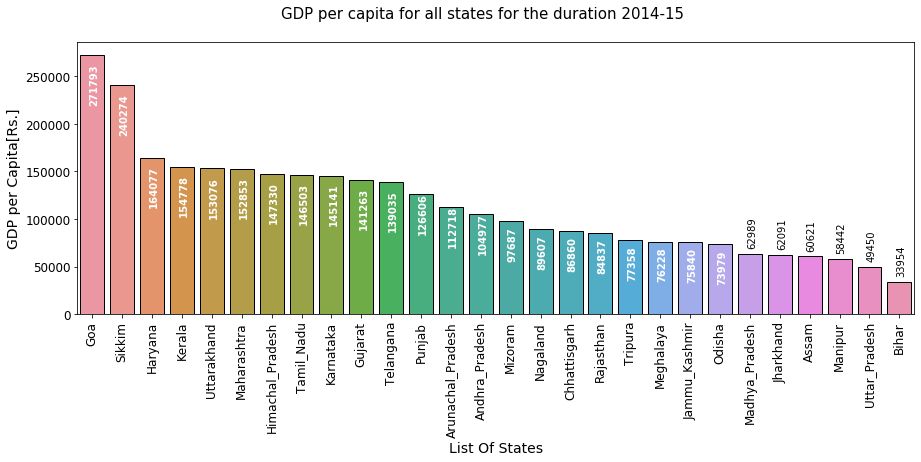

In [29]:
# Plot the GDP per capita for all the states for the duation 2014-15

plt.figure(figsize = (15,5))
fig = sns.barplot(x = df_states.index ,y = 'Per Capita GSDP (Rs.)', data =df_states, edgecolor = 'k')
plt.xticks(rotation=90)

plt.suptitle('GDP per capita for all states for the duration 2014-15', fontsize=15)

plt.xlabel('List Of States',fontsize=14)
plt.ylabel('GDP per Capita[Rs.]',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# for annotation , need different Y offset to make good representation. so for this i used if-else to adjust Y offset. 
count = 0
for p in fig.patches:
    count+=1
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if(count < len(df_GSDP_2015_16_t)*0.5):
        fig.annotate('{:.0f}'.format(height), (x+0.3, y + height-50000), 
                     fontsize=10, rotation=90, color = 'white',weight='bold')
    elif(count < len(df_GSDP_2015_16_t)*0.99):
        fig.annotate('{:.0f}'.format(height), (x+0.3, y + height-40000), 
                     fontsize=10, rotation=90, color = 'white',weight='bold')
    else:
        fig.annotate('{:.0f}'.format(height), (x+0.3, y + height+8000), 
                     fontsize=10, rotation=90, color = 'black')

plt.show()

### From the above bar plot, we can notice that   
**Top 5 high GDP per Capita states :**  Goa, Sikkim, Haryna, Kerala, Uttarakhand  
**bottom 5 low GDP per Capita states :**  Bihar, Uttar_Pradesh, Manipur, Assam, Jharkhand

In [30]:
# Find the ratio of the highest per capita GDP to the lowest per capita GDP
Ratio = round(df_states['Per Capita GSDP (Rs.)'].max()/df_states['Per Capita GSDP (Rs.)'].min(),2)
print('Ration of the Highest GDP per Capita to lowest GDP per Capita :{}'.format(Ratio))

Ration of the Highest GDP per Capita to lowest GDP per Capita :8.0


In [31]:
# create new dataframe with required columns
df_states_sectors = df_states[['Primary','Secondary','Tertiary']]  

# use apply method to calculate 'Primary','Secondary'&'Tertiary' sectors values as percentage of individual state total GDP.

df_states_sectors = df_states_sectors.apply(lambda row: round((row/df_states['Gross State Domestic Product'])*100,2))

In [32]:
df_states_sectors.head()

,Primary,Secondary,Tertiary
State Name,,,
Goa,7.68,38.09,42.78
Sikkim,9.12,55.57,31.76
Haryana,18.38,28.71,43.95
Kerala,12.34,22.95,56.41
Uttarakhand,11.40,47.18,34.50


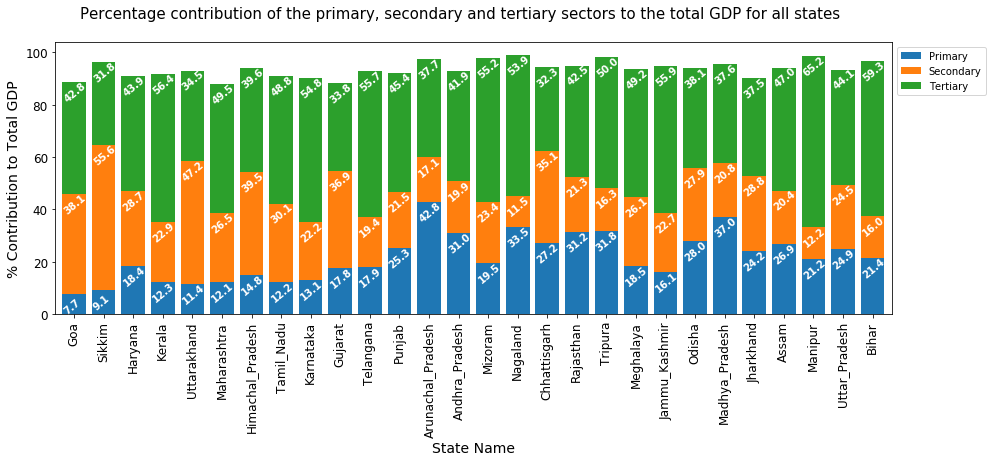

In [33]:
# Plot the percentage contribution of the primary, secondary and tertiary sectors 
# as a percentage of the total GDP for all the states. (Sorting based on GDP per capita of each state: Goa at highest side)

fig = df_states_sectors.plot(kind= 'bar', stacked = True, figsize = (15,5), width = 0.8)
plt.xticks(rotation=90)
plt.suptitle('Percentage contribution of the primary, secondary and tertiary sectors to the total GDP for all states',
             fontsize=15)
plt.xlabel('State Name',fontsize=14)
plt.ylabel('% Contribution to Total GDP',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(bbox_to_anchor=(1, 1))

for p in fig.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        fig.annotate('{:.1f}'.format(height), (x, y + height-7.5), fontsize=10, rotation=40, color = 'white',weight='bold')

plt.show()


**Plot is sorted based on GDP per capita. where Goa is at highest side**  
* **Top GDP per capita states contributes relatively less percentage  in primary sector than least GDP per capita states.**    
* **Top GDP per capita states contributes high percentage  in secondary sector than least GDP per capita states.**  

**In the following analysis we can see the plot with respect to category wise to visulize even better.**

In [34]:
# Creating quantile values for making categories of 'Per Capita GSDP (Rs.)'

quantile_bins = (df_states['Per Capita GSDP (Rs.)'].quantile([0,0.2,0.5,0.85,1]).values).round(2)
quantile_bins[0] = 0
quantile_bins

array([     0.  ,  67385.  , 101332.  , 153064.85, 271793.  ])

In [35]:
# Creating Categorical column based on 'Per Capita GSDP (Rs.)' quantiles

df_states['Group_Gdp_per_capita'] = pd.cut(df_states['Per Capita GSDP (Rs.)'], 
                                           bins=quantile_bins, 
                                           labels=['C4', 'C3', 'C2', 'C1'])

In [36]:
# drop the columns which are not required while checking categories of GCP per capita w.r.t sub-sectors

df_states_categorised = df_states.drop(columns = ['Primary','Secondary','Tertiary','Per Capita GSDP (Rs.)'])

In [37]:
df_states_categorised.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product,Group_Gdp_per_capita
State Name,,,,,,,,,,,,,
Goa,3085.07,36.22,11776.08,2041.10,1658.19,3809.27,1896.56,2336.18,4070.99,3464.86,1804.31,40633.07,C1
Sikkim,1374.47,13.29,5506.97,2124.99,820.58,705.68,473.47,210.79,753.30,1195.14,1492.65,15209.33,C1
Haryana,80152.38,251.86,77569.21,11019.19,37025.71,49863.19,25606.23,16714.86,69701.83,10363.77,20015.81,437462.07,C1
Kerala,59306.17,5588.24,42735.67,4824.70,73140.03,85573.45,40209.34,20103.06,72876.33,20689.15,57286.45,526002.30,C1
Uttarakhand,16014.23,2445.49,58662.52,4338.80,13427.33,17431.06,10666.93,3850.30,8313.07,5794.09,9824.30,161985.29,C1


In [38]:
# grouped dataframe by 'Group_Gdp_per_capita' categorical column and making sum of groups of states w.r.t categories 

df_states_grouped = df_states_categorised.groupby('Group_Gdp_per_capita').sum()

# use apply method to calculate each sub-sector values as a percentage of categorical wise total GDP.

df_states_grouped = df_states_grouped.apply(lambda row: round((row/df_states_grouped['Gross State Domestic Product'])*100,2))

# drop the column 'Gross State Domestic Product', as it is not required for next steps of plot creation

df_states_grouped.drop(columns = 'Gross State Domestic Product', inplace = True)

# assign units to the each column. as [%]
df_states_grouped.columns = df_states_grouped.columns+'[%]' 

In [39]:
df_states_grouped_t = df_states_grouped.transpose() 
df_states_grouped_t.sort_values(by = 'C1',ascending = False, inplace = True) # sorted based on Highest category states (C1)
df_states_grouped_t

Group_Gdp_per_capita,C4,C3,C2,C1
,,,,
Manufacturing[%],10.71,13.49,17.34,16.61
"Agriculture, forestry and fishing[%]",24.32,21.42,14.20,13.54
"Trade, repair, hotels and restaurants[%]",11.78,10.27,10.23,13.32
"Real estate, ownership of dwelling & professional services[%]",10.37,9.72,15.36,13.18
Construction[%],9.76,8.74,7.06,10.67
Other services[%],6.80,7.05,6.34,7.65
"Transport, storage, communication & services related to broadcasting[%]",6.94,5.81,6.06,6.68
Financial services[%],3.29,3.13,6.07,3.66
Public administration[%],5.78,5.23,3.24,3.51


In [40]:
# function for warping text, used for plots labels 
from textwrap import wrap

def wrap_text(labels):
    labels = ['\n'.join(wrap(l,25)) for l in labels]
    return(labels)

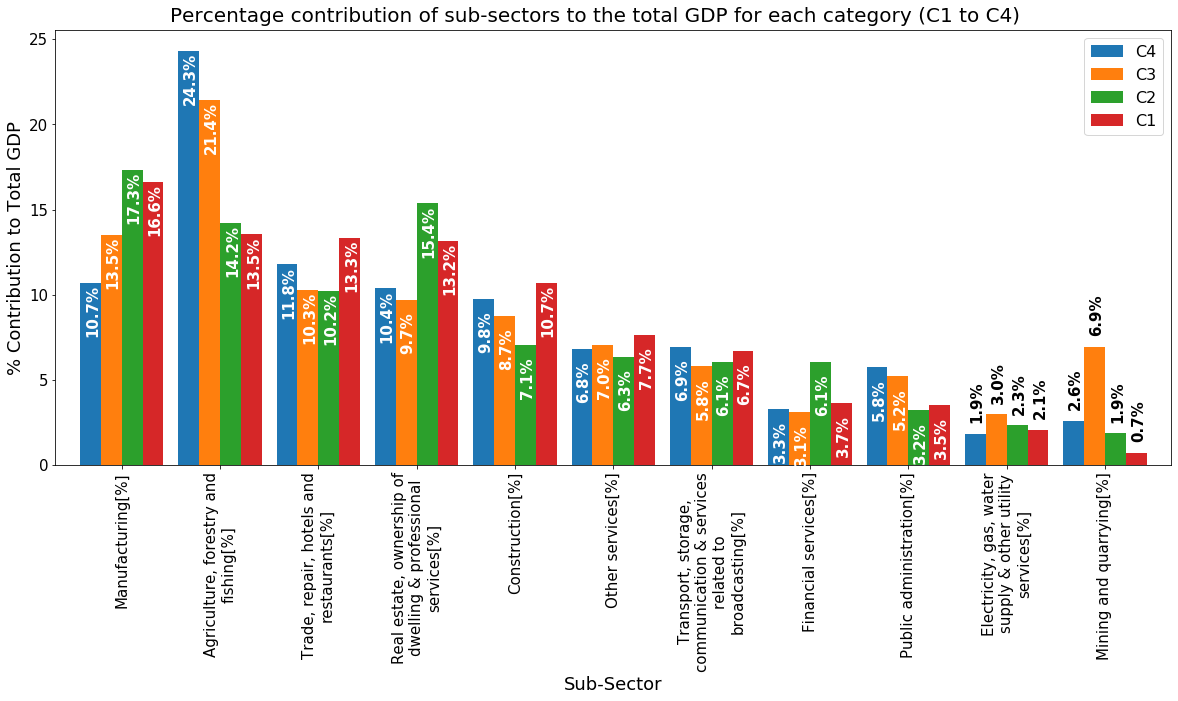

In [41]:
# Plot the percentage contribution of sub-sectors  
# as a percentage of the total GDP for each category based on GDP per Capita.

fig = df_states_grouped_t.plot(kind= 'bar', figsize = (20,8), width = 0.85)

plt.suptitle('Percentage contribution of sub-sectors to the total GDP for each category (C1 to C4)',
             fontsize=20, y = 0.92)
plt.xlabel('Sub-Sector',fontsize=18)
plt.ylabel('% Contribution to Total GDP',fontsize=18)

labels = wrap_text(list(df_states_grouped_t.index))

plt.xticks(range(len(df_states_grouped_t.index)), labels, rotation=90, fontsize=15)

plt.yticks(fontsize=15)

plt.legend(prop={'size': 16})

# for annotation , need different Y offset to make good representation. so for this i used if-else to adjust Y offset. 
count = 0
for p in fig.patches:
    count+=1
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if(count < len(df_states_grouped_t)*0.90):
        fig.annotate('{:.1f}%'.format(height), (x+0.05, y + height-3.0), 
                     fontsize=15, rotation=90, color = 'white',weight='bold')
    else:
        fig.annotate('{:.1f}%'.format(height), (x+0.05, y + height+0.8), 
                     fontsize=15, rotation=90, color = 'black',weight='bold')
    
        if(count==len(df_states_grouped_t)):
            count = 0
        else:
            pass
plt.show()

**Plot is sorted based on Highest category states (C1). where sub-sector : Manufacturing is at highest side for C1 category**

**Top percent contribution sub- sectors to the total GDP:** 
* **Manufacturing.**
* **Agriculture, forestry & fishing.**
* **Trade, repair, hotels & restaurants.**
* **Real estate, ownership of dwelling & professional services.**

**It is important to understand, why some of the sub-sectors (Electricity, gas, water supply & other utility services) contributing very less percent to the total GDP. Need to investigate and if there is any possibility to improve, then it is good to uplift more number of sub-sectors to play active roll in improving GDP per capita equally.**

**The States are categorized into four groups (C1,C2,C3&C4) based on the GDP per capita percentiles.**
**Following are the percentile ranges considered for categorization:**
* **C1: 85th to 100th**
* **C2: 50th to 85th**
* **C3: 20th to 50th**
* **C4: below 20th**  

**We will consider these categories for further analysis**

In [42]:
# function for sorting values of each category and extract top sub sectors, 
# that are contributing approximately 80% of its category GDP

def top_sub_sectors(df, index_name):
    df = df.transpose()
    for i,(idx, column) in enumerate(df.iteritems()):                 # for each columns
        if (idx == index_name):                                       # if column name is equal to func input 'index.name' 
            df = df.sort_values(by = [idx], ascending = False )       # sort values with specified column
            df = df[idx].to_frame()                                   # Create new data frame with selecting specified column
            for i,(idx, column) in enumerate(df.iteritems()):         # for -loop with new created data frame  
                loc = 100
                index = 0
                for j in range(1,len(df)):                            # for-loop with each row values
                    items_sum = column[:j].sum()                      # sum of 'j' items
                    diff = abs(items_sum - 80)                        # checking for absolute defference with 80
                    if diff < loc:                                    # checking for resulting least possible 'diff'value       
                        loc = diff
                        index = j                                     # update the index to return final data frame result 
                    else:
                        pass
                return(column[:index].to_frame())                    # result data frame with top sub-sectors of selected 
                                                                     # catagory as index_name in the function input

In [43]:
# calling 'top_sub_sectors' function to get top sub-sectors, that are contributing approximately 80% of its category GDP

df_C1_sub_sectors = top_sub_sectors(df_states_grouped, 'C1')
df_C2_sub_sectors = top_sub_sectors(df_states_grouped, 'C2')
df_C3_sub_sectors = top_sub_sectors(df_states_grouped, 'C3')
df_C4_sub_sectors = top_sub_sectors(df_states_grouped, 'C4')

df_C4_sub_sectors

,C4
,
"Agriculture, forestry and fishing[%]",24.32
"Trade, repair, hotels and restaurants[%]",11.78
Manufacturing[%],10.71
"Real estate, ownership of dwelling & professional services[%]",10.37
Construction[%],9.76
"Transport, storage, communication & services related to broadcasting[%]",6.94
Other services[%],6.80


In [44]:
# function for sub-box plot with all setting of additional parameters

def axes_bar_plot(subplot_no,df,category):
    bar_plot_colors = ['#5cb85c','#73E030','#A0EF2C','#C9EF2C','#F2F37B','#FDDF73','#ECD379','#ECD379']
    ax = axes[subplot_no]
    ax.bar(x = df.index,height = category, data = df, color = bar_plot_colors, edgecolor = 'k', width = 0.9)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end+3,2))
    ax.xaxis.set_tick_params( rotation=90)
    
    labels_raw = list(df.index) 
    labels = ['\n'.join(wrap(l,35)) for l in labels_raw]
    ax.set_xticklabels(labels , rotation = 90)
    
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.tick_params(axis='both', which='minor', labelsize=13)
    ax.set_title('Catogery_{}_Sub-Sectors'.format(subplot_no+1), fontsize = 18, pad = 20) 
    #ax.set_ylabel('% Contribution to GDP', fontsize = 17)
    #ax.set_xlabel('Sub-Sectors', fontsize = 17)
    
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.1f}%'.format(height), (x+0.03, y + height + .4),fontsize=10)
    

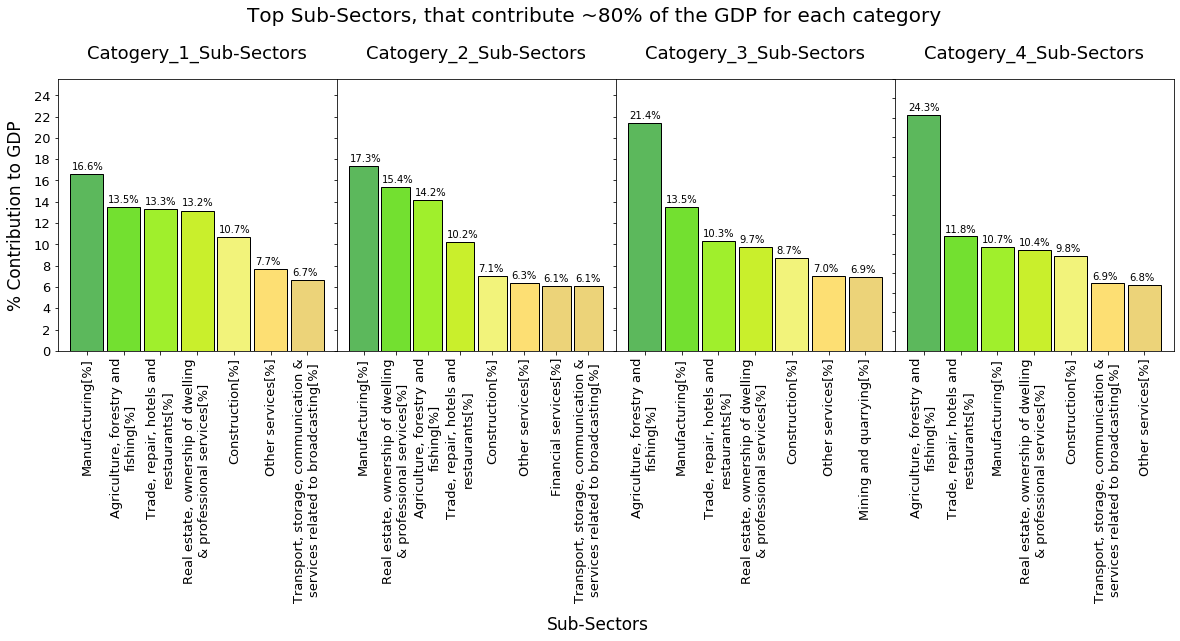

In [45]:
# Plot the ~80% contribution of the sub-sectors as a percentage of the GSDP of each category

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)  
fig.suptitle('Top Sub-Sectors, that contribute ~80% of the GDP for each category ', fontsize=20, y=1.08)

axes_bar_plot(0,df_C1_sub_sectors,'C1')
axes_bar_plot(1,df_C2_sub_sectors,'C2')
axes_bar_plot(2,df_C3_sub_sectors,'C3')
axes_bar_plot(3,df_C4_sub_sectors,'C4')

fig.text(0.5, -0.65, 'Sub-Sectors', ha='center',fontsize = 17)
fig.text(0.09, 0.5, '% Contribution to GDP', va='center', rotation='vertical', fontsize = 17)

fig.subplots_adjust(wspace=0.0)

**It is clear to identify, that, In manufacturing sub sector category C1 & C2 is contributing good percentage than category 3 or 4. whereas cetegory 3 & 4 contributing good in primary sectors.** 

**The GDP distribution from the top states (C1) is different from others.**  
* **From the top states(C1), there are five sub-sectors each contributing more than 10 % of total GDP, whereas other category states having four or less sub-sectors.**
* **Top five sub-sectors from category C1, majority of them equally (approx.)  contributing percentage to the total GDP.**

**Top 7 sub-sectors contribute to approximately 80% of the GDP**
* Manifacturing
* Agriculture, forestry and fishing
* Trade, repair, hotels and restaurants
* Real estate, ownership of dwelling & professional services
* Construction
* Other services
* Transport, storage, communication & services related to broadcasting


**For Category C1 & C2 : It is recommended to focus on Secondary & Tertiary sectors as priority.  Following are the recommended sub-sectors priority wise.**
* **Manufacturing**
* **Trade-repair-hotel-restaurants**
* **Real estate, ownership of dwelling & professional services**
* **Agriculture-forestry-fishing**  

**For Category C3 & C4 : It is recommended to focus on Primary & Tertiary sectors as priority.  Following are the recommended sub-sectors priority wise.**
* **Agriculture-forestry-fishing**
* **Trade-repair-hotel-restaurants**
* **Real estate, ownership of dwelling & professional services**
* **Manufacturing**


In [46]:
# function for converting sub-sectors to sectors to check the sector percentage contribution in GDP category wise
def Sub_Sector_To_Sector(df,category):
    sectors_from_sub_sectors = {'Manufacturing[%]': 'Secondary[%]',
                                'Agriculture, forestry and fishing[%]': 'Primary[%]',
                                'Trade, repair, hotels and restaurants[%]':'Tertiary[%]',
                                'Real estate, ownership of dwelling & professional services[%]': 'Tertiary[%]',
                                'Trade & repair services[%]':'Tertiary[%]',
                                'Construction[%]': 'Secondary[%]',
                                'Mining and quarrying[%]':'Primary[%]',
                                'Electricity, gas, water supply & other utility services[%]':'Secondary[%]',
                                'Other services[%]':'Tertiary[%]',
                                'Transport, storage, communication & services related to broadcasting[%]':'Tertiary[%]',
                                'Financial services[%]':'Tertiary[%]',
                                'Public administration[%]':'Tertiary[%]'
                               }
    df = df.reset_index()
    df.columns = ['Sector',category]
    df['Sector'] = df['Sector'].replace(sectors_from_sub_sectors)
    df = df.groupby(by = 'Sector').sum()
    return(df)

In [47]:
# Creating dataframe with percentage contribution of sectors in GSDP
C1 = Sub_Sector_To_Sector(df_C1_sub_sectors, 'C1')
C2 = Sub_Sector_To_Sector(df_C2_sub_sectors, 'C2')
C3 = Sub_Sector_To_Sector(df_C3_sub_sectors, 'C3')
C4 = Sub_Sector_To_Sector(df_C3_sub_sectors, 'C4')

C1_C4 = pd.concat([C1, C2, C3, C4], axis = 1 )
C1_C4.sort_values('C1', ascending = False, inplace = True) # sorting based on C1 category states
C1_C4

,C1,C2,C3,C4
Sector,,,,
Tertiary[%],40.83,44.06,27.04,27.04
Secondary[%],27.28,24.40,22.23,22.23
Primary[%],13.54,14.20,28.35,28.35


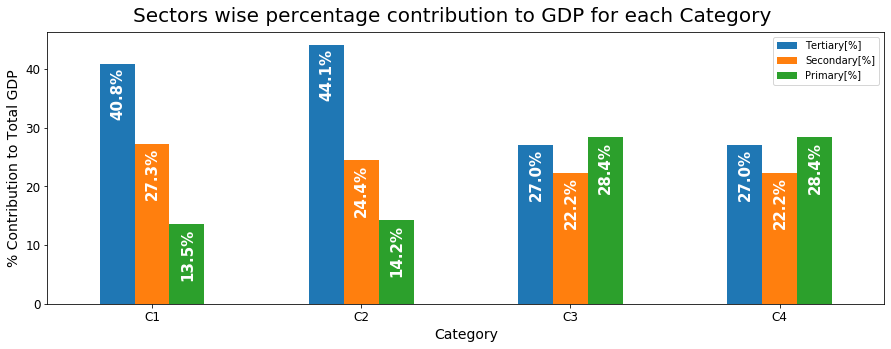

In [48]:
# Plot the percentage contribution of the primary, secondary and tertiary sectors to the ~80% of the total GDP of each category 

fig = C1_C4.T.plot(kind= 'bar', figsize = (15,5))
plt.xticks(rotation=0)

plt.suptitle('Sectors wise percentage contribution to GDP for each Category', fontsize=20, y=0.95) 

plt.xlabel('Category',fontsize=14)
plt.ylabel('% Contribution to Total GDP',fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(bbox_to_anchor=(1, 1))

# following function for annotations 
for p in fig.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        fig.annotate('{:.1f}%'.format(height), (x+0.05, y + height-9), fontsize=15, rotation=90, color = 'white',weight='bold' )

        
plt.show()

**From the above plot, it is clear that, Top states (category C1, C2) having higher GDP distribution from Tertiary & Secondary sectors than other categories (C3 or C4)**  

***For getting best progess in Secondary & Tertiary, we need educated people. So it is intresting to check the correlation between total GDP w.r.t education people availability.***

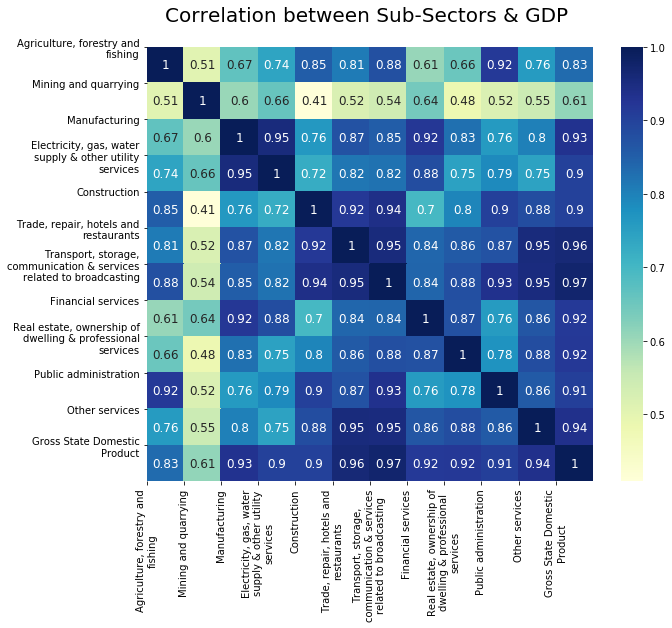

In [49]:
# up on my interest i create heatmap to see the correlation among the each sub sectors and also with GSDP
plt.figure(figsize = (10,8))
sns.heatmap(df_states_categorised.corr(), annot=True ,annot_kws={"size": 12}, cmap = 'YlGnBu')

labels = wrap_text(list(df_states_categorised.columns[:12]))
plt.xticks(range(len(df_states_categorised.columns[:12])), labels, rotation=90, fontsize=10, ha = 'center')
plt.yticks(range(len(df_states_categorised.columns[:12])), labels, fontsize=10, ha = 'right')

plt.suptitle('Correlation between Sub-Sectors & GDP', fontsize=20, x = 0.43 ,y=0.95) 

plt.show()

**The most correlated sub-sectors with high GDP (Correlation factor >= 0.95)**
* Transport, storage, communication & services related to broadcasting (correlation factor with GDP = 0.97)
* Trade, repair, hotels and restaurants (correlation factor with GDP = 0.96)

**Tertiary & Seconday sectors are highly positively correlated with GDP. whereas Primary sectors also having positive correlation but relatively less than other two sectors**

In [50]:
#extract the GDP column of correlation data and sort the values 
df_sub_sectors_corr_GDP = round(df_states_categorised.corr()['Gross State Domestic Product'].sort_values(ascending = False),2)

# remove the GDP from Index to avoid correlation value 1 w.r.t to same variable
df_sub_sectors_corr_GDP.drop(index = 'Gross State Domestic Product', inplace = True )

#covert the series to dataframe
df_sub_sectors_corr_GDP = df_sub_sectors_corr_GDP.to_frame()

# Rename the index to "Sub-Sectors"
df_sub_sectors_corr_GDP.rename_axis(index = 'Sub-Sector', inplace = True)
df_sub_sectors_corr_GDP.rename(columns = {'Gross State Domestic Product' : 'Correlation factor with GSDP'}, inplace = True)

df_sub_sectors_corr_GDP # GSDP correlation facors with respect to all sub-sectors

,Correlation factor with GSDP
Sub-Sector,
"Transport, storage, communication & services related to broadcasting",0.97
"Trade, repair, hotels and restaurants",0.96
Other services,0.94
Manufacturing,0.93
"Real estate, ownership of dwelling & professional services",0.92
Financial services,0.92
Public administration,0.91
Construction,0.90
"Electricity, gas, water supply & other utility services",0.90


# Part 2

In [51]:
# load "drop out" csv
df_drop_out = pd.read_csv('DropOutRate_Data.csv')
df_drop_out.set_index('Level of Education - State', inplace= True)  # set index

In [52]:
df_drop_out.info() # checking for type of all columns, all good no need any action, 

#but noticed primary 2014-2015 column name issue 

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, A & N Islands to All India
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sl. No.                       37 non-null     object 
 1   Primary - 2012-2013           29 non-null     float64
 2   Primary - 2014-2015           33 non-null     float64
 3   Primary - 2014-2015.1         31 non-null     float64
 4   Upper Primary - 2012-2013     31 non-null     float64
 5   Upper Primary - 2013-2014     35 non-null     float64
 6   Upper Primary - 2014-2015     35 non-null     float64
 7   Secondary - 2012-2013         34 non-null     float64
 8   Secondary - 2013-2014         36 non-null     float64
 9   Secondary - 2014-2015         36 non-null     float64
 10  Senior Secondary - 2012-2013  24 non-null     float64
 11  Senior Secondary - 2013-2014  27 non-null     float64
 12  Senior Secondary - 2014-2015  28 non-null     float6

**There is a duplicate column name in the dataframe. i assume that 'Primary - 2014-2015' is suppose to be 'Primary - 2013-2014'
and 'Primary - 2014-2015.1' this column should be renamed to ''Primary - 2014-2015'**  

In [53]:
# considering my assumption, i have corrected Primary 2014-2015 column name
df_drop_out.rename(columns = {'Primary - 2014-2015':'Primary - 2013-2014', 
                              'Primary - 2014-2015.1': 'Primary - 2014-2015'}, inplace = True)

In [54]:
df_drop_out.shape

(37, 13)

In [55]:
df_drop_out.head()

,Sl. No.,Primary - 2012-2013,Primary - 2013-2014,Primary - 2014-2015,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
Level of Education - State,,,,,,,,,,,,,
A & N Islands,1,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
Andhra Pradesh,2,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
Arunachal Pradesh,3,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
Assam,4,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
Bihar,5,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [56]:
# select only required columns for analysis
df_drop_out_2014_15 = df_drop_out[['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

In [57]:
df_drop_out_2014_15.info()  # there are some missing values.

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, A & N Islands to All India
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Primary - 2014-2015        31 non-null     float64
 1   Upper Primary - 2014-2015  35 non-null     float64
 2   Secondary - 2014-2015      36 non-null     float64
dtypes: float64(3)
memory usage: 1.2+ KB


In [58]:
# create new dataframe which will contain "perCapita GSDP"
df_GDP_per_Capita = df_states[['Per Capita GSDP (Rs.)']]

In [59]:
df_GDP_per_Capita.head()

,Per Capita GSDP (Rs.)
State Name,
Goa,271793.0
Sikkim,240274.0
Haryana,164077.0
Kerala,154778.0
Uttarakhand,153076.0


In [60]:
df_GDP_per_Capita.index

Index(['Goa', 'Sikkim', 'Haryana', 'Kerala', 'Uttarakhand', 'Maharashtra',
       'Himachal_Pradesh', 'Tamil_Nadu', 'Karnataka', 'Gujarat', 'Telangana',
       'Punjab', 'Arunachal_Pradesh', 'Andhra_Pradesh', 'Mizoram', 'Nagaland',
       'Chhattisgarh', 'Rajasthan', 'Tripura', 'Meghalaya', 'Jammu_Kashmir',
       'Odisha', 'Madhya_Pradesh', 'Jharkhand', 'Assam', 'Manipur',
       'Uttar_Pradesh', 'Bihar'],
      dtype='object', name='State Name')

In [61]:
df_drop_out_2014_15.index

Index(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhatisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttrakhand',
       'West Bengal', 'All India'],
      dtype='object', name='Level of Education - State')

**The index state names of both 'df_GDP_per_Capita' and 'df_drop_out_2014_15' data frames are not the same. So need to rename the state names in one dataframe to make same name for the state in the both dataframes**

In [62]:
# identify the different state names and make rename in 'df_drop_out_2014_15' dataframe
df_drop_out_2014_15 = df_drop_out_2014_15.rename(index = {'A & N Islands':'Andaman_Nicobar_Islands',
                                   'Andhra Pradesh':'Andhra_Pradesh',
                                   'Arunachal Pradesh': 'Arunachal_Pradesh',
                                    'Chhatisgarh':'Chhattisgarh',
                                   'Himachal Pradesh' :'Himachal_Pradesh',
                                   'Jammu and Kashmir':'Jammu_Kashmir',
                                   'Madhya Pradesh':'Madhya_Pradesh',
                                   'Tamil Nadu':'Tamil_Nadu',
                                   'Uttar Pradesh':'Uttar_Pradesh',
                                   'Uttrakhand':'Uttarakhand'})


In [63]:
# merge two dataframes
df_combine = pd.merge(df_GDP_per_Capita,df_drop_out_2014_15 ,left_index=True, right_index=True)
df_combine.info() # this data is used to plot scatter plot, so NaN values will exclude automatically. 
#so we can keep them as of now to have maximum states data available for atleast secondary.

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Goa to Bihar
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Per Capita GSDP (Rs.)      28 non-null     float64
 1   Primary - 2014-2015        25 non-null     float64
 2   Upper Primary - 2014-2015  26 non-null     float64
 3   Secondary - 2014-2015      28 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB


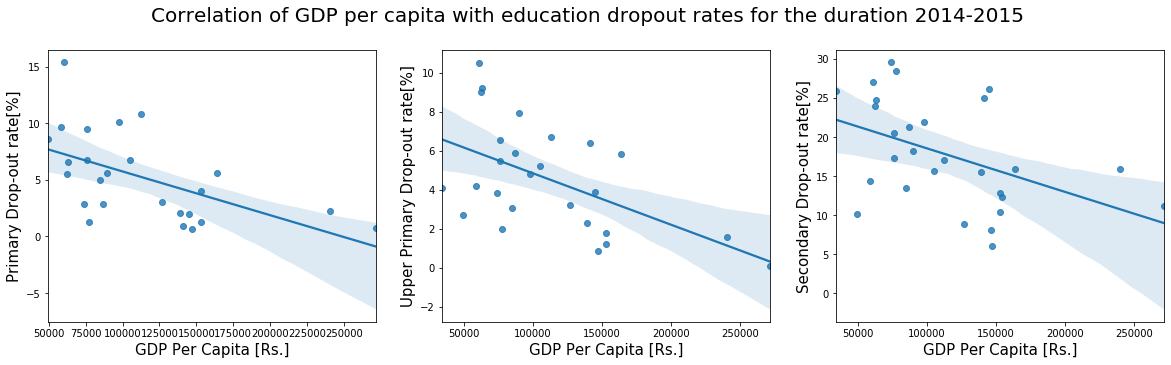

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5)) 

fig.suptitle('Correlation of GDP per capita with education dropout rates for the duration 2014-2015', fontsize=20, y=1.0)

# sub plot 1
plt.subplot(131)
sns.regplot(x = 'Per Capita GSDP (Rs.)', y = 'Primary - 2014-2015', data = df_combine)
plt.xlabel('GDP Per Capita [Rs.]', fontsize = 15)
plt.ylabel('Primary Drop-out rate[%]', fontsize = 15)

#sub plot 2
plt.subplot(132)
sns.regplot(x = 'Per Capita GSDP (Rs.)', y = 'Upper Primary - 2014-2015', data = df_combine)
plt.xlabel('GDP Per Capita [Rs.]', fontsize = 15)
plt.ylabel('Upper Primary Drop-out rate[%]', fontsize = 15)

# sub plot 3
plt.subplot(133)
sns.regplot(x = 'Per Capita GSDP (Rs.)', y = 'Secondary - 2014-2015', data = df_combine)
plt.xlabel('GDP Per Capita [Rs.]', fontsize = 15)
plt.ylabel('Secondary Drop-out rate[%]', fontsize = 15)

plt.show()

**There is a reasonable negative correlation between GDP per capita & drop out rates.**   
**Primary and Upper Primary drop out having better negative correlation with GDP per capita than Secondary drop out.** 

**I assume that,  there is need of minimum of primary and upper primary education to perform in secondary and tertiary sectors, therefore primary and upper primary having high correlation with GDP per capita.** 

**So it is recommended to ensure higher literacy percentage to make influence in GDP per capita.**